# **Assignment 4**
###E/19/346
###S.M.T.N. SAMARATHUNGE
###EM 317

## **Problem 1**

**(i) Proving that the interval $[-1,1]$ contains only a single root of the function:**\
\
 $$ f(x) = 0.5x e^{-0.5x} + 0.5 $$
 To prove that the interval $[-1,1]$ contains only a single root of $ f(x) $, we need to show that the function is either strictly increasing or strictly decreasing in this interval, considering the sign change of first derivative within $[-1,1]$.

$$ f'(x) = -0.25x e^{-0.5x} + 0.5 e^{-0.5x} $$


Checking the sign of $f'(x)$ over the interval $[-1,1]$

In [1]:
from sympy import symbols, exp, diff

x = symbols('x')
f = 0.5*x * exp(-0.5*x) + 1/2

# First derivative of the function
f_prime = diff(f, x)

f, f_prime

(0.5*x*exp(-0.5*x) + 0.5, -0.25*x*exp(-0.5*x) + 0.5*exp(-0.5*x))

Evaluating the sign of $ f'(x) $ in the subintervals $[-1, 0]$ and $[0, 1]$

In [2]:
from sympy import solve

# Finding critical points of f'(x) in the interval [-1, 1]
critical_points = solve(f_prime, x)
critical_points_in_interval = [cp for cp in critical_points if cp.is_real and -1 <= cp <= 1]

critical_points_in_interval

[]

In [3]:
from sympy import N

# Evaluating the sign of f'(x) in the subintervals
sign_in_subintervals = []

for point in [-1, 1]:
    sign_in_subintervals.append(N(f_prime.subs(x, point)))

sign_in_subintervals

[1.23654095302510, 0.151632664928158]

The sign of $f'(x)$ at the points $-1$ and $1$  are;
$$ At\ x= -1,\ f'(x)\ is\ positive$$
$$At\ x= 1,\ f'(x)\ is\ positive$$

This shows that $ f(x) $ is strictly increasing, confirming a single root in $[-1,1]$.


**(ii) Using the bisection method to approximate the root with four iterations:**

In [4]:
def bisection_method(f, a, b, iterations):
    """
    Performing the bisection method on the function f, starting with the interval [a, b].
    The method is performed for a specified number of iterations.
    """
    for i in range(iterations):
        mid_point = (a + b) / 2
        if f.subs(x, a) * f.subs(x, mid_point) < 0:
            b = mid_point
        else:
            a = mid_point
    return mid_point

# Approximating the root using the bisection method for four iterations
approximated_root = bisection_method(f, -1, 1, 4)
approximated_root

-0.625

Starting with the interval $[-1,1]$, after four iterations of the bisection method, the approximated root is:

$$ \text{Approximated Root} \approx -0.625$$

**(iii) Giving an error bound for the approximation:**

In [5]:
# Calculating the error bound
initial_interval_length = 1 - (-1)  # b - a
iterations = 4
error_bound = initial_interval_length / (2**iterations)
error_bound

0.125

Providing an error bound for the approximation
The error bound after four iterations is calculated as:

$$ \text{Error Bound} = \frac{b - a}{2^n} = \frac{1 - (-1)}{2^4} = 0.125 $$


**(iv) Determining the number of iterations required to guarantee an error less than $10^{-6}$ :**

In [6]:
def f(x):
    return  0.5*x * exp(-0.5*x) + 1/2

def bisection_method_tol(f, a, b, tolerance):

    iterations = 0
    while abs(b - a) > tolerance:
        mid_point = (a + b) / 2
        if f(a) * f(mid_point) < 0:
            b = mid_point
        else:
            a = mid_point
        iterations += 1
    return mid_point, iterations

a, b = -1, 1

# Tolerance level
tolerance = 10**(-6)

# Applying Bisection Method
root, iterations = bisection_method_tol(f, a, b, tolerance)

print(f"Number of iterations needed to guarantee an error less than {tolerance}: {iterations}")


Number of iterations needed to guarantee an error less than 1e-06: 21


To achieve an error less than $10^{-6}$, the required number of iterations is $21$.

## **Problem 2**

**(i) Finding all solutions of $f(x) = e^{2x} - x - 6 $, correct to 4 decimal places using appropriate initial conditions:**\
\
$$f(x) = e^{2x} - x - 6 $$ $$
f'(x) =  2e^{2x} - 1 $$

Newton's method estimates the root using the formula:
$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$


In [7]:
from sympy import symbols, diff, solve

x = symbols('x')
f_2i = exp(2*x) -x - 6
f_2i_prime = diff(f_2i, x)

# Finding the real roots of the equation symbolically
real_roots = solve(f_2i, x)
real_roots = [root.evalf() for root in real_roots]  # Converting to numerical values

real_roots

[-5.99999385571214, 0.970870020275800]

The real roots of the equation $ e^{2x} - x - 6 = 0 $ are approximately $ x \approx -6.0000,0.9709 $.

Using Newton's method to approximate the real roots to 4 decimal places


In [8]:
# Newton's method
def newtons_method(f, f_prime, initial_guess, tolerance=1e-4):
    x_n = initial_guess
    iterations = 0
    while True:
        x_next = x_n - f.subs(x, x_n) / f_prime.subs(x, x_n)
        iterations += 1
        if abs(x_next - x_n) < tolerance:
            return x_next, iterations
        x_n = x_next

# Apply Newton's method with the initial guess close to the real root -6.0000
initial_guess = -5.5
approximated_root, num_iterations = newtons_method(f_2i, f_2i_prime, initial_guess)

print(initial_guess)
print(approximated_root)
print(num_iterations,"\n")

# Apply Newton's method with the initial guess close to the real root 0.9709
initial_guess = 0.7
approximated_root, num_iterations = newtons_method(f_2i, f_2i_prime, initial_guess)

print(initial_guess)
print(approximated_root)
print(num_iterations)

-5.5
-5.99999385571214
2 

0.7
0.970870020275800
5


The approximate real roots of the equation $ e^{2x} - x - 6 = 0 $ obtained using Newton's method with an,

*   Initial guess of $-5.5$ is $ x \approx -6.0000 $, was reached in 2 iterations, accurate to 4 decimal places.

*   Initial guess of $0.7$ is $ x \approx 0.9709 $, was reached in just 5 iterations, accurate to 4 decimal places.

**(ii) Approximating a solution to $ f(x) = -x^3 + 4x^2 - 2x + 2 $  starting from $ x = 0 $:**\
\
$$ f(x) = -x^3 + 4x^2 - 2x + 2 $$
$$ f'(x) = -3x^2 + 8x - 2 $$


Using Newton's method starting with an initial guess of $ x = 0 $

In [9]:
f_2ii = -x**3 + 4*x**2 - 2*x + 2
f_2ii_prime = diff(f_2ii, x)

# Applying Newton's method with the initial guess x = 3.4
initial_guess_2ii = 3.4
approximated_root_2ii, num_iterations_2ii = newtons_method(f_2ii, f_2ii_prime, initial_guess_2ii)
approximated_root_2ii, num_iterations_2ii

(3.59867450788156, 4)

When using Newton's method with an initial guess of $ x =0, $ it does not converges to the answer.
\
However, when the initial guess is $x=3.4$, the solution to $ -x^3 + 4x^2 - 2x + 2 = 0 $ is approximately $ x \approx 3.5987 $ and this was reached in 4 iterations.


**(iii) Approximating solutions of  $ f(x) = x^3 - 3x^2 + 2x$ starting at $ x = 1.4, 1.44, 1.447, 1.4475, 1.448, 1.45, 1.5$:**\
\
$$ f(x) = x^3 - 3x^2 + 2x$$
$$ f'(x) = 3x^2 - 6x + 2 $$

Using Newton's method with different initial guesses: $ 1.4, 1.44, 1.447, 1.4475, 1.448, 1.45, 1.5$


In [10]:
f_2iii = x**3 - 3*x**2 + 2*x
f_2iii_prime = diff(f_2iii, x)

# Initial guesses
initial_guesses_2iii = [1.4, 1.44, 1.447, 1.4475, 1.448, 1.45, 1.5]

# Applying Newton's method for each initial guess
results_2iii = [(guess, newtons_method(f_2iii, f_2iii_prime, guess)) for guess in initial_guesses_2iii]
results_2iii

[(1.4, (1.00000000000184, 4)),
 (1.44, (1.00000000000000, 6)),
 (1.447, (1.00000000000000, 8)),
 (1.4475, (2.00000000000003, 9)),
 (1.448, (-4.21212635720570e-10, 9)),
 (1.45, (-5.58592180485967e-11, 13)),
 (1.5, (0, 2))]

$$ f(x) = x^3 - 3x^2 + 2x$$

| Initial Guess      | Approximate solution| No. of iterations|
|---------|----------|----------|
|1.4      | 1.0000   | 4   |
|1.44     | 1.0000   |6    |
|1.447    | 1.0000   | 8   |
|1.4475   | 1.0000   | 9   |
|1.448    | 0.0000   | 9   |
|1.45     | 0.0000   |13   |
|1.5      | 0.0000   | 2   |

## **Problem 3**

**(i) Graph the following system in the plane and mark the solutions to the system:**
\
 $$  x^2 + y^2 = 4 $$
 $$  e^x + y = 1 $$

<ipython-input-11-a24216ec3d6d>:5: RuntimeWarning: invalid value encountered in sqrt
  y_values_1 = np.sqrt(4 - x_values**2)  # Solving x^2 + y^2 = 4 for y


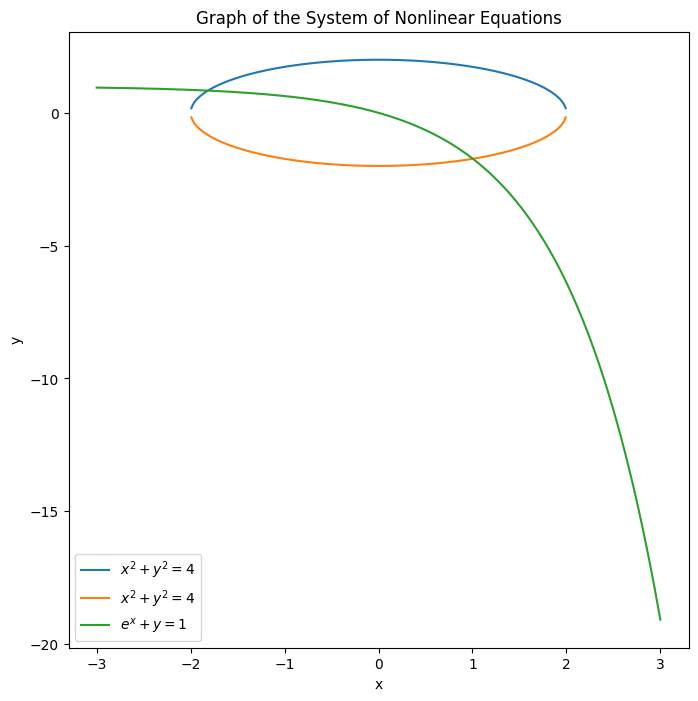

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.linspace(-3, 3, 400)
y_values_1 = np.sqrt(4 - x_values**2)  # Solving x^2 + y^2 = 4 for y
y_values_2 = -np.exp(x_values) + 1  # Solving x + y = 1 for y

plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values_1, label=r'$x^2 + y^2 = 4$')
plt.plot(x_values, -y_values_1, label=r'$x^2 + y^2 = 4$')
plt.plot(x_values, y_values_2, label=r'$e^x + y = 1$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of the System of Nonlinear Equations')
plt.legend()
plt.show()


**(ii)  Jacobian of the system:**

The Jacobian matrix for a system of two functions $ f(x, y) $ and $ g(x, y) $ is given by:
\
$$ J = \begin{bmatrix} \frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\ \frac{\partial g}{\partial x} & \frac{\partial g}{\partial y} \end{bmatrix} $$

Here, $ f(x, y) = x^2 + y^2 - 4 $ and $ g(x, y) = e^x + y - 1 $


In [12]:
# Calculating the Jacobian
from sympy import symbols, diff

x, y = symbols('x y')
f = x**2 + y**2 - 4
g = exp(x) + y - 1

Jacobian = [[diff(f, x), diff(f, y)], [diff(g, x), diff(g, y)]]
Jacobian

[[2*x, 2*y], [exp(x), 1]]

**(iii) Solving the system using Newton's method with initial points $x_0 = (1,1)^T$ and identifying the solution it converges to:**

Newton's method for a system of nonlinear equations,
$$ \begin{bmatrix} x_{n+1} \\ y_{n+1} \end{bmatrix} = \begin{bmatrix} x_n \\ y_n \end{bmatrix} - J^{-1} \begin{bmatrix} f(x_n, y_n) \\ g(x_n, y_n) \end{bmatrix} $$
Initial point =  $ (1, 1)^T $.


In [13]:
import numpy as np
import sympy as sp

def newtons_method_system(f_sym, g_sym, x_sym, y_sym, initial_point, tolerance=1e-4, max_iterations=50):
    # Computing the Jacobian matrix symbolically
    J_sym = sp.Matrix([f_sym, g_sym]).jacobian([x_sym, y_sym])

    # Converting symbolic expressions to numerical functions using lambdify
    f = sp.lambdify((x_sym, y_sym), f_sym, 'numpy')
    g = sp.lambdify((x_sym, y_sym), g_sym, 'numpy')
    J = sp.lambdify((x_sym, y_sym), J_sym, 'numpy')

    iteration_count = 0

    # Newton's method
    x_n = np.array(initial_point, dtype=float)
    for _ in range(max_iterations):
        J_inv = np.linalg.inv(J(*x_n))
        F_val = np.array([f(*x_n), g(*x_n)])
        x_next = x_n - np.dot(J_inv, F_val)

        iteration_count += 1

        if np.linalg.norm(x_next - x_n) < tolerance:
            return x_next, iteration_count
        x_n = x_next

    return x_n, iteration_count

x_sym, y_sym = sp.symbols('x y')

# Defining functions symbolically
f_sym = x_sym**2 + y_sym**2 - 4
g_sym = sp.exp(x_sym) + y_sym - 1

initial_point = (1, 1)

# Applying Newton's method
result, iterations = newtons_method_system(f_sym, g_sym, x_sym, y_sym, initial_point)
print("Solution:", result)
print("Iterations:", iterations)


Solution: [-1.81626407  0.8373678 ]
Iterations: 7


Using Newton's method with the initial point  $(1,1)^T$ , the system converges to a different solution: approximately  $(−1.8163,0.8374)$  in 7 iterations.


**(iv) Can you start with initial condition $x_0 = (0,0)^T? $**\
\
Applying Newton's method with the initial condition
$x_0 =(0,0) ^T$
  results in a "matrix is numerically singular" error. This indicates that the Jacobian matrix at this point is singular (i.e., not invertible), which prevents the method from proceeding. Therefore, we cannot start Newton's method with the initial condition
$x_0 =(0,0) ^T$.

In [14]:
# Newton's method with an alternate initial point
alternate_initial_point = (0,0)
alternate_solution, alternate_num_iterations = newtons_method_system(f_sym, g_sym, x_sym, y_sym, alternate_initial_point)
print("Solution:", alternate_solution)
print("Iterations:", alternate_num_iterations)

LinAlgError: ignored

**(v) Finding an initial condition so that the Newton method converge to a different solution:**

Here, we can choose a point near the intersection on the negative x-axis, such as $ (1, -2) $ and $ (-1,2)$.

In [ ]:
alternate_initial_point = (1,-2)
alternate_solution, alternate_num_iterations = newtons_method_system(f_sym, g_sym, x_sym, y_sym, alternate_initial_point)
print("Solution:", alternate_solution)
print("Iterations:", alternate_num_iterations)

Using Newton's method with the initial point $ (1, -2) $, the system converges to a different solution: approximately $ (1.0042 -1.7296) $ in 3 iterations.

In [ ]:
alternate_initial_point = (-1,2)
alternate_solution, alternate_num_iterations = newtons_method_system(f_sym, g_sym, x_sym, y_sym, alternate_initial_point)
print("Solution:", alternate_solution)
print("Iterations:", alternate_num_iterations)

Using Newton's method with the initial point $ (-1, 2) $, the system converges to a different solution: approximately $ (-1.8163 ,0.8374) $ in 5 iterations.